<center style="color:red;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:blue;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
<center style="color:black;font-size:20px;padding:5px"><b><a href="https://github.com/dhptrung/P4DS-FinalProject">Thùng chứa GitHub</a></b></center>

---

| MSSV | Họ và tên | Tài khoản GitHub |
|:----:|:---:|:---:|
|18120066| Bùi Đoàn Hữu Nhân | https://github.com/bdhnhan |
|18120097| Đinh Hữu Phúc Trung| https://github.com/dhptrung |

# Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Thu thập dữ liệu

## Dữ liệu là về chủ đề gì và lấy từ nguồn nào?

- Chủ đề: Về tuổi thọ của các quốc gia, là tập hợp các yếu tố ảnh hưởng đến tuổi thọ trung bình của các quốc gia trên thế giới.
- Nguồn: Tập dữ liệu được lấy từ Kaggle - [WHO national life expectancy](https://www.kaggle.com/mmattson/who-national-life-expectancy)

## Người ta có cho phép dùng dữ liệu như này không?

- Đây là bộ dữ liệu được tác giả công khai và cung cấp theo giấy phép **CC0: Public Domain (Giấy phép Creative Commons)**.
- Với giấy phép trên tác giả từ chối toàn bộ quyền sở hữu đối với bộ dữ liệu này. Bắt cứ ai đều có thể sao chép, sửa đổi, phân phối, ngay cả cho mục đích thương mại mà không cần xin phép.

## Người ta thu thập dữ liệu như thế nào?

- Bộ dữ liệu này được WHO cung cấp và được thu thập từ nhiều nguồn, chủ yếu là sử dụng thông tin của GHO (Đài quan sát sức khỏe toàn cầu) và UNESCO (Tổ chức Giáo dục, Khoa học và Văn hóa Liên Hợp Quốc).
- Tập dữ liệu được sử dụng trong đồ án này là một phần nhỏ các yếu tố ảnh hưởng đến tuổi thọ của 183 quốc gia và trong khoảng thời gian từ năm 2000 đến năm 2016. 

# Khám phá dữ liệu

## Đọc dữ liệu vào dataframe

In [2]:
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
df.shape

(3111, 32)

Dữ liệu có **3111 dòng** và **32 cột**.

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo quan sát sơ bộ về dữ liệu thì mỗi dòng cho biết thông tin về tuổi thọ trung bình và các yếu tố ảnh hưởng đến tuổi thọ trung bình của một quốc gia trong một năm. Không có vấn đề các dòng có ý nghĩa khác nhau.

## Dữ liệu có các dòng bị lặp không?

In [6]:
have_duplicated_rows = df.duplicated().any()
have_duplicated_rows

False

Dữ liệu không có dòng nào bị lặp.

## Mỗi cột có ý nghĩa gì?

| Tên cột | Ý nghĩa của cột | 
|:---------|:-----------------|
| ***country*** | Tên quốc gia |
| ***country_code*** | Mã định danh quốc gia gồm 3 chữ cái |
| ***region*** | Khu vực của quốc gia |
| ***year*** | Năm |
| ***life_expect*** | Tuổi thọ trung bình trong năm |
| ***life_exp60*** | Life expectancy at age 60 (years)|
| ***adult_mortality*** | Tỷ lệ tử vong ở người trưởng thành của cả 2 giới (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
| ***infant_mort*** | Tỷ lệ tử vong đến 1 tuổi |
| ***age1-4mort*** | Tỷ lệ tử vong trong độ tuổi từ 1 đến 4 |
| ***alcohol*** | Rượu, mức tiêu thụ bình quân đầu người (15+) được ghi nhận (tính bằng lít rượu nguyên chất) |
| ***bmi*** | BMI trung bình (kg/m^2) (18+) (ước tính theo tuổi được chuẩn hóa) |
| ***age5-19thinness*** | Tỷ lệ gầy ở trẻ em và thanh thiếu niên, BMI < (trung bình - 2s.d.) (ước tính thô) (%) |
| ***age5-19obesity*** | Tỷ lệ béo phì ở trẻ em và thanh thiếu niên, BMI > (trung vị + 2s.d.) (ước tính thô) (%) |
| ***hepatitis*** | Tỷ lệ tiêm chủng viêm gan B (HepB) ở trẻ 1 tuổi (%) |
| ***measles*** | Tỷ lệ tiêm ngừa vắc xin sởi mũi 1 (MCV1) ở trẻ 1 tuổi (%) |
| ***polio*** | Tỷ lệ tiêm chủng bại liệt (Pol3) ở trẻ 1 tuổi (%) |
| ***diphtheria*** | Tỷ lệ tiêm chủng giải độc tố uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%) |
| ***basic_water*** | Dân số sử dụng ít nhất các dịch vụ nước uống cơ bản |
| ***doctors*** | Số bác sĩ y khoa (trên 10.000 dân) |
| ***hospitals*** | Mật độ bệnh viện trên 100.000 dân |
| ***gni_capita*** | Tổng thu nhập quốc dân trên đầu người |
| ***gghe-d*** | Chi tiêu chung cho y tế của chính phủ trong nước (GGHE-D) tính theo phần trăm tổng sản phẩm quốc nội (GDP) |
| ***che_gdp*** | Chi tiêu cho y tế hiện tại (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%) |
| ***une_pop*** | Dân số (hàng nghìn) |
| ***une_infant*** | Tỷ lệ tử vong trẻ sơ sinh (trên 1.000 trẻ đẻ sống) |
| ***une_life*** | Tuổi thọ trung bình, tổng (năm) |
| ***une_hiv*** | Tỷ lệ nhiễm HIV (% dân số từ 15-49 tuổi) |
| ***une_gni*** | GNI bình quân đầu người, PPP (đô la quốc tế hiện tại) |
| ***une_poverty*** | Tỷ lệ nghèo đói ở mức 1,90 đô la một ngày (PPP) (% dân số) |
| ***une_edu_spend*** | Chi tiêu của chính phủ cho giáo dục tính theo tỷ lệ phần trăm của GDP (%) |
| ***une_literacy*** | Tỷ lệ người lớn biết chữ, dân số trên 15 tuổi, cả hai giới (%) |
| ***une_school*** | Số năm đi học trung bình (ISCED 1 trở lên), dân số từ 25 tuổi trở lên, cả hai giới |

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
df.dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

Tất cả các cột đều đã có kiểu dữ liệu phù hợp.

# Tiền xử lý dữ liệu

Bỏ một số cột có nội dung tương tự nhau. ***(Chỗ này cần họp để chọn ra các cột cần bỏ)***

# Khám phá dữ liệu (tiếp tục)

## Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Sau đó lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 4 cột là ....

In [15]:
pd.set_option('display.max_columns', 30) # Để nhìn rõ hơn
cate_cols = ['country', 'country_code', 'region']
nume_cols = list(set(df.columns) - set(cate_cols))
def missing_ratio(s):
    return s.isnull().mean() * 100
nume_col_profiles_df = df[nume_cols].agg([missing_ratio, min, max])
nume_col_profiles_df

,measles,hepatitis,hospitals,polio,une_gni,che_gdp,bmi,une_infant,life_expect,basic_water,doctors,gghe-d,life_exp60,infant_mort,age1-4mort,une_life,une_edu_spend,age5-19thinness,alcohol,une_poverty,diphtheria,une_hiv,une_pop,year,une_school,adult_mortality,gni_capita,une_literacy,age5-19obesity
missing_ratio,0.610736,18.289939,95.821279,0.610736,3.760849,3.760849,1.092896,0.0,0.00000,1.028608,42.783671,3.214401,0.00000,0.000000,0.000000,0.00000,41.337191,1.092896,1.60720,70.652523,0.610736,23.818708,1.189328e+00,0.0,74.124076,0.00000,21.922212,81.645773,1.092896
min,16.000000,2.000000,0.000000,8.000000,420.000000,1.025160,19.800000,1.6,36.22736,18.695210,0.128000,0.062360,10.72800,0.001470,0.000065,39.44100,0.787440,0.100000,0.00000,0.100000,19.000000,0.100000,7.601600e+01,2000.0,0.559340,49.20185,250.000000,14.376040,0.100000
max,99.000000,99.000000,56.446950,99.000000,122670.000000,20.413410,32.200000,142.4,84.16616,100.000010,79.541000,12.062730,26.39402,0.164515,0.039095,83.98488,14.059080,28.100000,20.18246,94.100000,99.000000,28.200000,1.414049e+06,2016.0,14.378800,696.87420,123860.000000,99.998190,26.700000


Min, max không có gì bất thường ở đây cả!

**Tiếp tục khám phá các cột numeric**

Xem thử tần suất xuất hiện của các năm trong dữ liệu có bằng nhau không?

In [38]:
df['year'].value_counts().sort_index()

2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    183
2014    183
2015    183
2016    183
Name: year, dtype: int64

*Nhận xét:* Mỗi năm đều chiếm 183 dòng trong dữ liệu. Điều này là hợp lý, vì theo mô tả, dữ liệu là thông tin của 183 quốc gia trong 17 năm (2000 - 2016) và mỗi dòng là mỗi quốc gia trong 1 năm.

**Ta sẽ tiến hành trực quan phân phối giá trị của một số cột quan trọng để hiểu rõ dữ liệu hơn.**

Phân phối giá trị của cột "life_expect"

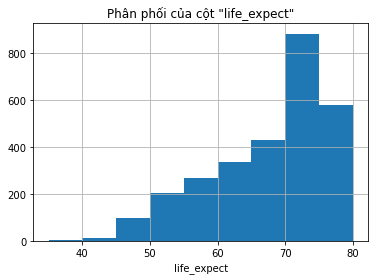

In [30]:
df['life_expect'].hist(bins=np.arange(35, 85, 5))
plt.xlabel('life_expect')
plt.title('Phân phối của cột "life_expect"')
plt.show()

*Nhận xét:* Tuổi thọ trung bình mỗi năm của các nước chủ yếu rơi vào khoảng 65-80 tuổi.

Phân phối giá trị của cột "..." **(Họp lấy ra 2-3 cột quan trọng nữa để trực quan rồi nhận xét tiếp)**

## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với mỗi cột categorical, ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Sau đó lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 3 cột là "country", "country_code", "region". 

In [16]:
pd.set_option('display.max_colwidth', 200) # Để nhìn rõ hơn
def num_diff_vals(s):
    return s.dropna().nunique()
def diff_vals(s):
    return s.dropna().unique()
cate_col_profiles_df = df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])
cate_col_profiles_df

,country,country_code,region
missing_ratio,0.0,0.0,0.0
num_diff_vals,183,183,6
diff_vals,"[Angola, Burundi, Benin, Burkina Faso, Botswana, Central African Republic, United Republic of Tanzania, Uganda, South Africa, Zambia, Zimbabwe, South Sudan, Sao Tome and Principe, Eswatini, Seyche...","[AGO, BDI, BEN, BFA, BWA, CAF, TZA, UGA, ZAF, ZMB, ZWE, SSD, STP, SWZ, SYC, TCD, TGO, NAM, NER, NGA, RWA, SEN, SLE, MDG, MLI, MOZ, MRT, MUS, MWI, GMB, GNB, GNQ, KEN, LBR, LSO, DZA, ERI, ETH, GAB, ...","[Africa, Americas, Eastern Mediterranean, Europe, South-East Asia, Western Pacific]"


Không có gì bất thường ở đây cả!

**Tiếp tục khám phá các cột categorical**

Xem thử tần suất xuất hiện của các quốc gia trong dữ liệu như thế nào?

In [25]:
df['country'].value_counts()

Dominican Republic      17
El Salvador             17
United Arab Emirates    17
Kuwait                  17
Switzerland             17
                        ..
Syrian Arab Republic    17
Colombia                17
Barbados                17
Guyana                  17
Panama                  17
Name: country, Length: 183, dtype: int64

*Nhận xét:* Mỗi quốc gia trong dữ liệu đều chiếm 17 dòng (điều này là hợp lý, như đã giải thích ở trên).

Trực quan tần suất xuất hiện của các khu vực trong dữ liệu.

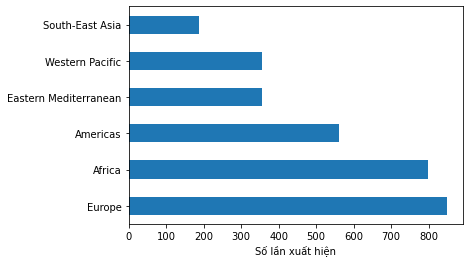

In [31]:
df['region'].value_counts().plot.barh()
plt.xlabel('Số lần xuất hiện')
plt.show()

*Nhận xét*: Như vậy trong dữ liệu, các quốc gia ở khu vực **Europe** là xuất hiện nhiều nhất, sau đó đến **Africa**, **Americas** và các khu vực khác.

# Tiền xử lý dữ liệu (tiếp tục)

Vì các cột "hospitals", "doctors", "une_edu_spend", "une_poverty", "une_school", "une_literacy" có tỉ lệ % giá trị thiếu cao nên ta sẽ tiến hành xóa các cột này đi.

In [17]:
df.drop(columns=['hospitals', 
                 'doctors', 
                 'une_edu_spend', 
                 'une_poverty',
                 'une_school', 
                 'une_literacy'], inplace=True)

**Số dòng, số cột của dữ liệu sau khi tiền xử lý.**

In [27]:
df.shape

(3111, 26)

# Đưa ra các câu hỏi cần trả lời

## Câu hỏi là gì?

## Nếu trả lời được câu hỏi thì sẽ có lợi ích gì?

# Tiền xử lý + phân tích dữ liệu để trả lời câu hỏi

## Câu 1

### Tiền xử lý (nếu có)

### Phân tích

## Câu 2

### Tiền xử lý (nếu có)

### Phân tích

## Câu 3

# Nhìn lại quá trình làm đồ án

## Đã gặp những khó khăn gì?

### Nhân

### Trung

## Có học được gì hữu ích không?

### Nhân 

### Trung

## Nếu có thêm thời gian thì sẽ làm gì?

# Tài liệu tham khảo